In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
# Loading dataset

train_df = pd.read_csv('/Users/kenny_jung/aiffel/data/apt/train.csv')
test_df = pd.read_csv('/Users/kenny_jung/aiffel/data/apt/test.csv')
park = pd.read_csv('/Users/kenny_jung/aiffel/data/apt/park.csv')
daycare = pd.read_csv('/Users/kenny_jung/aiffel/data/apt/day_care_center.csv')

In [3]:
train_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [5]:
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [6]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

In [7]:
daycare.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [8]:
daycare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


In [9]:
# Check missing values

train_df.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [10]:
park.isnull().sum()

city                              0
gu                                3
dong                              0
park_name                         0
park_type                         0
park_area                         0
park_exercise_facility         1082
park_entertainment_facility     924
park_benefit_facility          1093
park_cultural_facitiy          1287
park_facility_other            1184
park_open_year                  422
reference_date                    0
dtype: int64

In [11]:
daycare.isnull().sum()

city                       0
gu                         0
day_care_name              0
day_care_type              0
day_care_baby_num          0
teacher_num              225
nursing_room_num        3199
playground_num          3925
CCTV_num                2271
is_commuting_vehicle     496
reference_date             0
dtype: int64

In [ ]:
# # 'city'와 'gu' 별로 레코드 수 계산
# daycare_counts = daycare.groupby(['city', 'gu']).size().reset_index(name='daycare_counts')

# # park에 'city'와 'gu'를 기준으로 병합
# park = park.merge(daycare_counts, on=['city', 'gu'], how='left')

In [ ]:
# # 'city'와 'gu' 별로 daycare의 레코드 수 계산
# daycare_counts = daycare.groupby(['city', 'gu']).size().reset_index(name='daycare_counts')

# # 'city'와 'gu' 별로 park의 레코드 수 계산
# park_counts = park.groupby(['city', 'gu']).size().reset_index(name='park_counts')

# # daycare_counts와 park_counts를 'city'와 'gu'를 기준으로 병합
# df_counts = daycare_counts.merge(park_counts, on=['city', 'gu'], how='outer')

In [ ]:
# # 'daycare_counts' 칼럼에 따라 df_counts 정렬
# df_counts_sorted = df_counts.sort_values('daycare_counts', ascending=False)

# # 정렬된 데이터를 바탕으로 바 플롯 그리기
# fig = plt.figure(figsize=(15, 8))
# sns.barplot(data=df_counts_sorted, x='gu', y='daycare_counts', hue='city')
# plt.title('구별 보육시설 수')
# plt.xticks(rotation=90);

In [ ]:
# # 'daycare_counts' 칼럼에 따라 df_counts 정렬
# df_counts_sorted = df_counts.sort_values('park_counts', ascending=False)

# # 정렬된 데이터를 바탕으로 바 플롯 그리기
# fig = plt.figure(figsize=(15, 8))
# sns.barplot(data=df_counts_sorted, x='gu', y='park_counts', hue='city')
# plt.title('구별 공원 수') 
# plt.xticks(rotation=90);

In [ ]:
# # 'city', 'gu', 'dong'을 기준으로 park에서 중복 없이 레코드 선택
# park_dong = park[['city', 'gu', 'dong']].drop_duplicates()

# # df_counts에 'city'와 'gu'를 기준으로 park_dong 병합
# df_counts = df_counts.merge(park_dong, on=['city', 'gu'], how='left')

In [ ]:
# # 원하는 칼럼 순서
# columns_order = ['city', 'gu', 'dong', 'park_counts', 'daycare_counts']

# # df_counts의 칼럼 순서 변경
# df_counts = df_counts[columns_order]

In [ ]:
# train_df에 'city'와 'dong'을 기준으로 df_counts의 'park_counts'와 'daycare_counts' 추가
train_df = train_df.merge(df_counts[['city', 'dong', 'park_counts', 'daycare_counts']], on=['city', 'dong'], how='left')

In [12]:
# 'city', 'gu', 'day_care_type' 별로 그룹화하고 각 그룹의 레코드 수를 계산
group = daycare.groupby(['city', 'gu', 'day_care_type']).size().reset_index(name='counts')

# 'day_care_type' 별로 컬럼을 만들고, NaN 값을 0으로 채우기
daycare_group = group.pivot_table(index=['city', 'gu'], columns='day_care_type', values='counts', fill_value=0).reset_index()

# 'day_care' total 컬럼 추가
daycare_group['total'] = daycare_group['가정'] + daycare_group['국공립'] + daycare_group['민간'] + daycare_group['법인·단체'] + daycare_group['사회복지법인'] + daycare_group['직장'] + daycare_group['협동'] 

# 컬럼 이름에 'daycare_' 추가
daycare_group.columns = ['daycare_' + col if col not in ['city', 'gu'] else col for col in daycare_group.columns]

# 컬럼 이름을 간결하게 만들기
daycare_group.columns.name = None
daycare_group = daycare_group.reset_index(drop=True)
daycare_group.head()

,city,gu,daycare_가정,daycare_국공립,daycare_민간,daycare_법인·단체,daycare_사회복지법인,daycare_직장,daycare_협동,daycare_total
0,부산광역시,강서구,71.0,6.0,35.0,0.0,5.0,5.0,1.0,123.0
1,부산광역시,금정구,30.0,6.0,58.0,1.0,7.0,3.0,1.0,106.0
2,부산광역시,기장군,98.0,13.0,56.0,0.0,5.0,3.0,3.0,178.0
3,부산광역시,남구,65.0,12.0,50.0,2.0,6.0,6.0,2.0,143.0
4,부산광역시,동구,8.0,9.0,11.0,2.0,2.0,7.0,0.0,39.0


In [13]:
# 'city', 'gu', 'dong', 'park_type' 별로 그룹화하고 각 그룹의 레코드 수를 계산
group = park.groupby(['city', 'gu', 'dong', 'park_type']).size().reset_index(name='counts')

# 'park_type' 별로 컬럼을 만들고, NaN 값을 0으로 채우기
park_group = group.pivot_table(index=['city', 'gu', 'dong'], columns='park_type', values='counts', fill_value=0).reset_index()

# 'park' total 컬럼 추가
park_group['total'] = park_group['근린공원'] + park_group['기타'] + park_group['도시농업공원'] + park_group['묘지공원'] + park_group['문화공원'] + park_group['소공원'] + park_group['수변공원'] + park_group['어린이공원'] + park_group['역사공원'] + park_group['체육공원']

# 컬럼 이름에 'park_' 추가
park_group.columns = ['park_' + col if col not in ['city', 'gu', 'dong'] else col for col in park_group.columns]

# 컬럼 이름을 간결하게 만들기
park_group.columns.name = None
park_group = park_group.reset_index(drop=True)
park_group.head()

,city,gu,dong,park_근린공원,park_기타,park_도시농업공원,park_묘지공원,park_문화공원,park_소공원,park_수변공원,park_어린이공원,park_역사공원,park_체육공원,park_total
0,부산광역시,강서구,녹산동,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,부산광역시,강서구,대저1동,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,부산광역시,강서구,명지동,6.0,0.0,0.0,0.0,1.0,2.0,0.0,16.0,0.0,0.0,25.0
3,부산광역시,강서구,송정동,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,부산광역시,강서구,신호동,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0


In [14]:
city_gu_dong = pd.read_csv('/Users/kenny_jung/aiffel/data/apt/city_gu_dong.csv')
city_gu_dong

,city,gu,dong,Unnamed: 3,Unnamed: 4
0,서울특별시,종로구,청운동,NaN,NaN
1,서울특별시,종로구,신교동,NaN,NaN
2,서울특별시,종로구,궁정동,NaN,NaN
3,서울특별시,종로구,효자동,NaN,NaN
4,서울특별시,종로구,창성동,NaN,NaN
...,...,...,...,...,...
19827,제주특별자치도,NaN,하천리,NaN,NaN
19828,제주특별자치도,NaN,성읍리,NaN,NaN
19829,제주특별자치도,NaN,가시리,NaN,NaN
19830,제주특별자치도,NaN,세화리,NaN,NaN


In [15]:
# train_df에 'city', 'dong'을 기준으로 'gu' 추가
train_df = pd.merge(train_df, city_gu_dong[['city', 'dong', 'gu']], on=['city', 'dong'], how='left')

In [16]:
train_df.isnull().sum()

transaction_id                0
apartment_id                  0
city                          0
dong                          0
jibun                         0
apt                           0
addr_kr                       0
exclusive_use_area            0
year_of_completion            0
transaction_year_month        0
transaction_date              0
floor                         0
transaction_real_price        0
gu                        63735
dtype: int64

In [17]:
# 'city'와 'gu'를 기준으로 'train_df'와 'daycare_group'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'daycare_group'에서 일치하는 행을 병합합니다.
train_df = pd.merge(train_df, daycare_group, on=['city', 'gu'], how='left')

In [18]:
train_df.isnull().sum()

transaction_id                 0
apartment_id                   0
city                           0
dong                           0
jibun                          0
apt                            0
addr_kr                        0
exclusive_use_area             0
year_of_completion             0
transaction_year_month         0
transaction_date               0
floor                          0
transaction_real_price         0
gu                         63735
daycare_가정                177399
daycare_국공립               177399
daycare_민간                177399
daycare_법인·단체             177399
daycare_사회복지법인            177399
daycare_직장                177399
daycare_협동                177399
daycare_total             177399
dtype: int64

In [19]:
# 'city', 'gu', 'dong' 을 기준으로 'train_df'와 'park_group'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'park_group'에서 일치하는 행을 병합합니다.
train_df = pd.merge(train_df, park_group, on=['city', 'gu', 'dong'], how='left')

In [20]:
train_df.isnull().sum()

transaction_id                 0
apartment_id                   0
city                           0
dong                           0
jibun                          0
apt                            0
addr_kr                        0
exclusive_use_area             0
year_of_completion             0
transaction_year_month         0
transaction_date               0
floor                          0
transaction_real_price         0
gu                         63735
daycare_가정                177399
daycare_국공립               177399
daycare_민간                177399
daycare_법인·단체             177399
daycare_사회복지법인            177399
daycare_직장                177399
daycare_협동                177399
daycare_total             177399
park_근린공원                 295341
park_기타                   295341
park_도시농업공원               295341
park_묘지공원                 295341
park_문화공원                 295341
park_소공원                  295341
park_수변공원                 295341
park_어린이공원                295341
park_역사공원 

In [21]:
train_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,...,park_기타,park_도시농업공원,park_묘지공원,park_문화공원,park_소공원,park_수변공원,park_어린이공원,park_역사공원,park_체육공원,park_total
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247765 entries, 0 to 1247764
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1247765 non-null  int64  
 1   apartment_id            1247765 non-null  int64  
 2   city                    1247765 non-null  object 
 3   dong                    1247765 non-null  object 
 4   jibun                   1247765 non-null  object 
 5   apt                     1247765 non-null  object 
 6   addr_kr                 1247765 non-null  object 
 7   exclusive_use_area      1247765 non-null  float64
 8   year_of_completion      1247765 non-null  int64  
 9   transaction_year_month  1247765 non-null  int64  
 10  transaction_date        1247765 non-null  object 
 11  floor                   1247765 non-null  int64  
 12  transaction_real_price  1247765 non-null  int64  
 13  gu                      1184030 non-null  object 
 14  da

<Axes: >

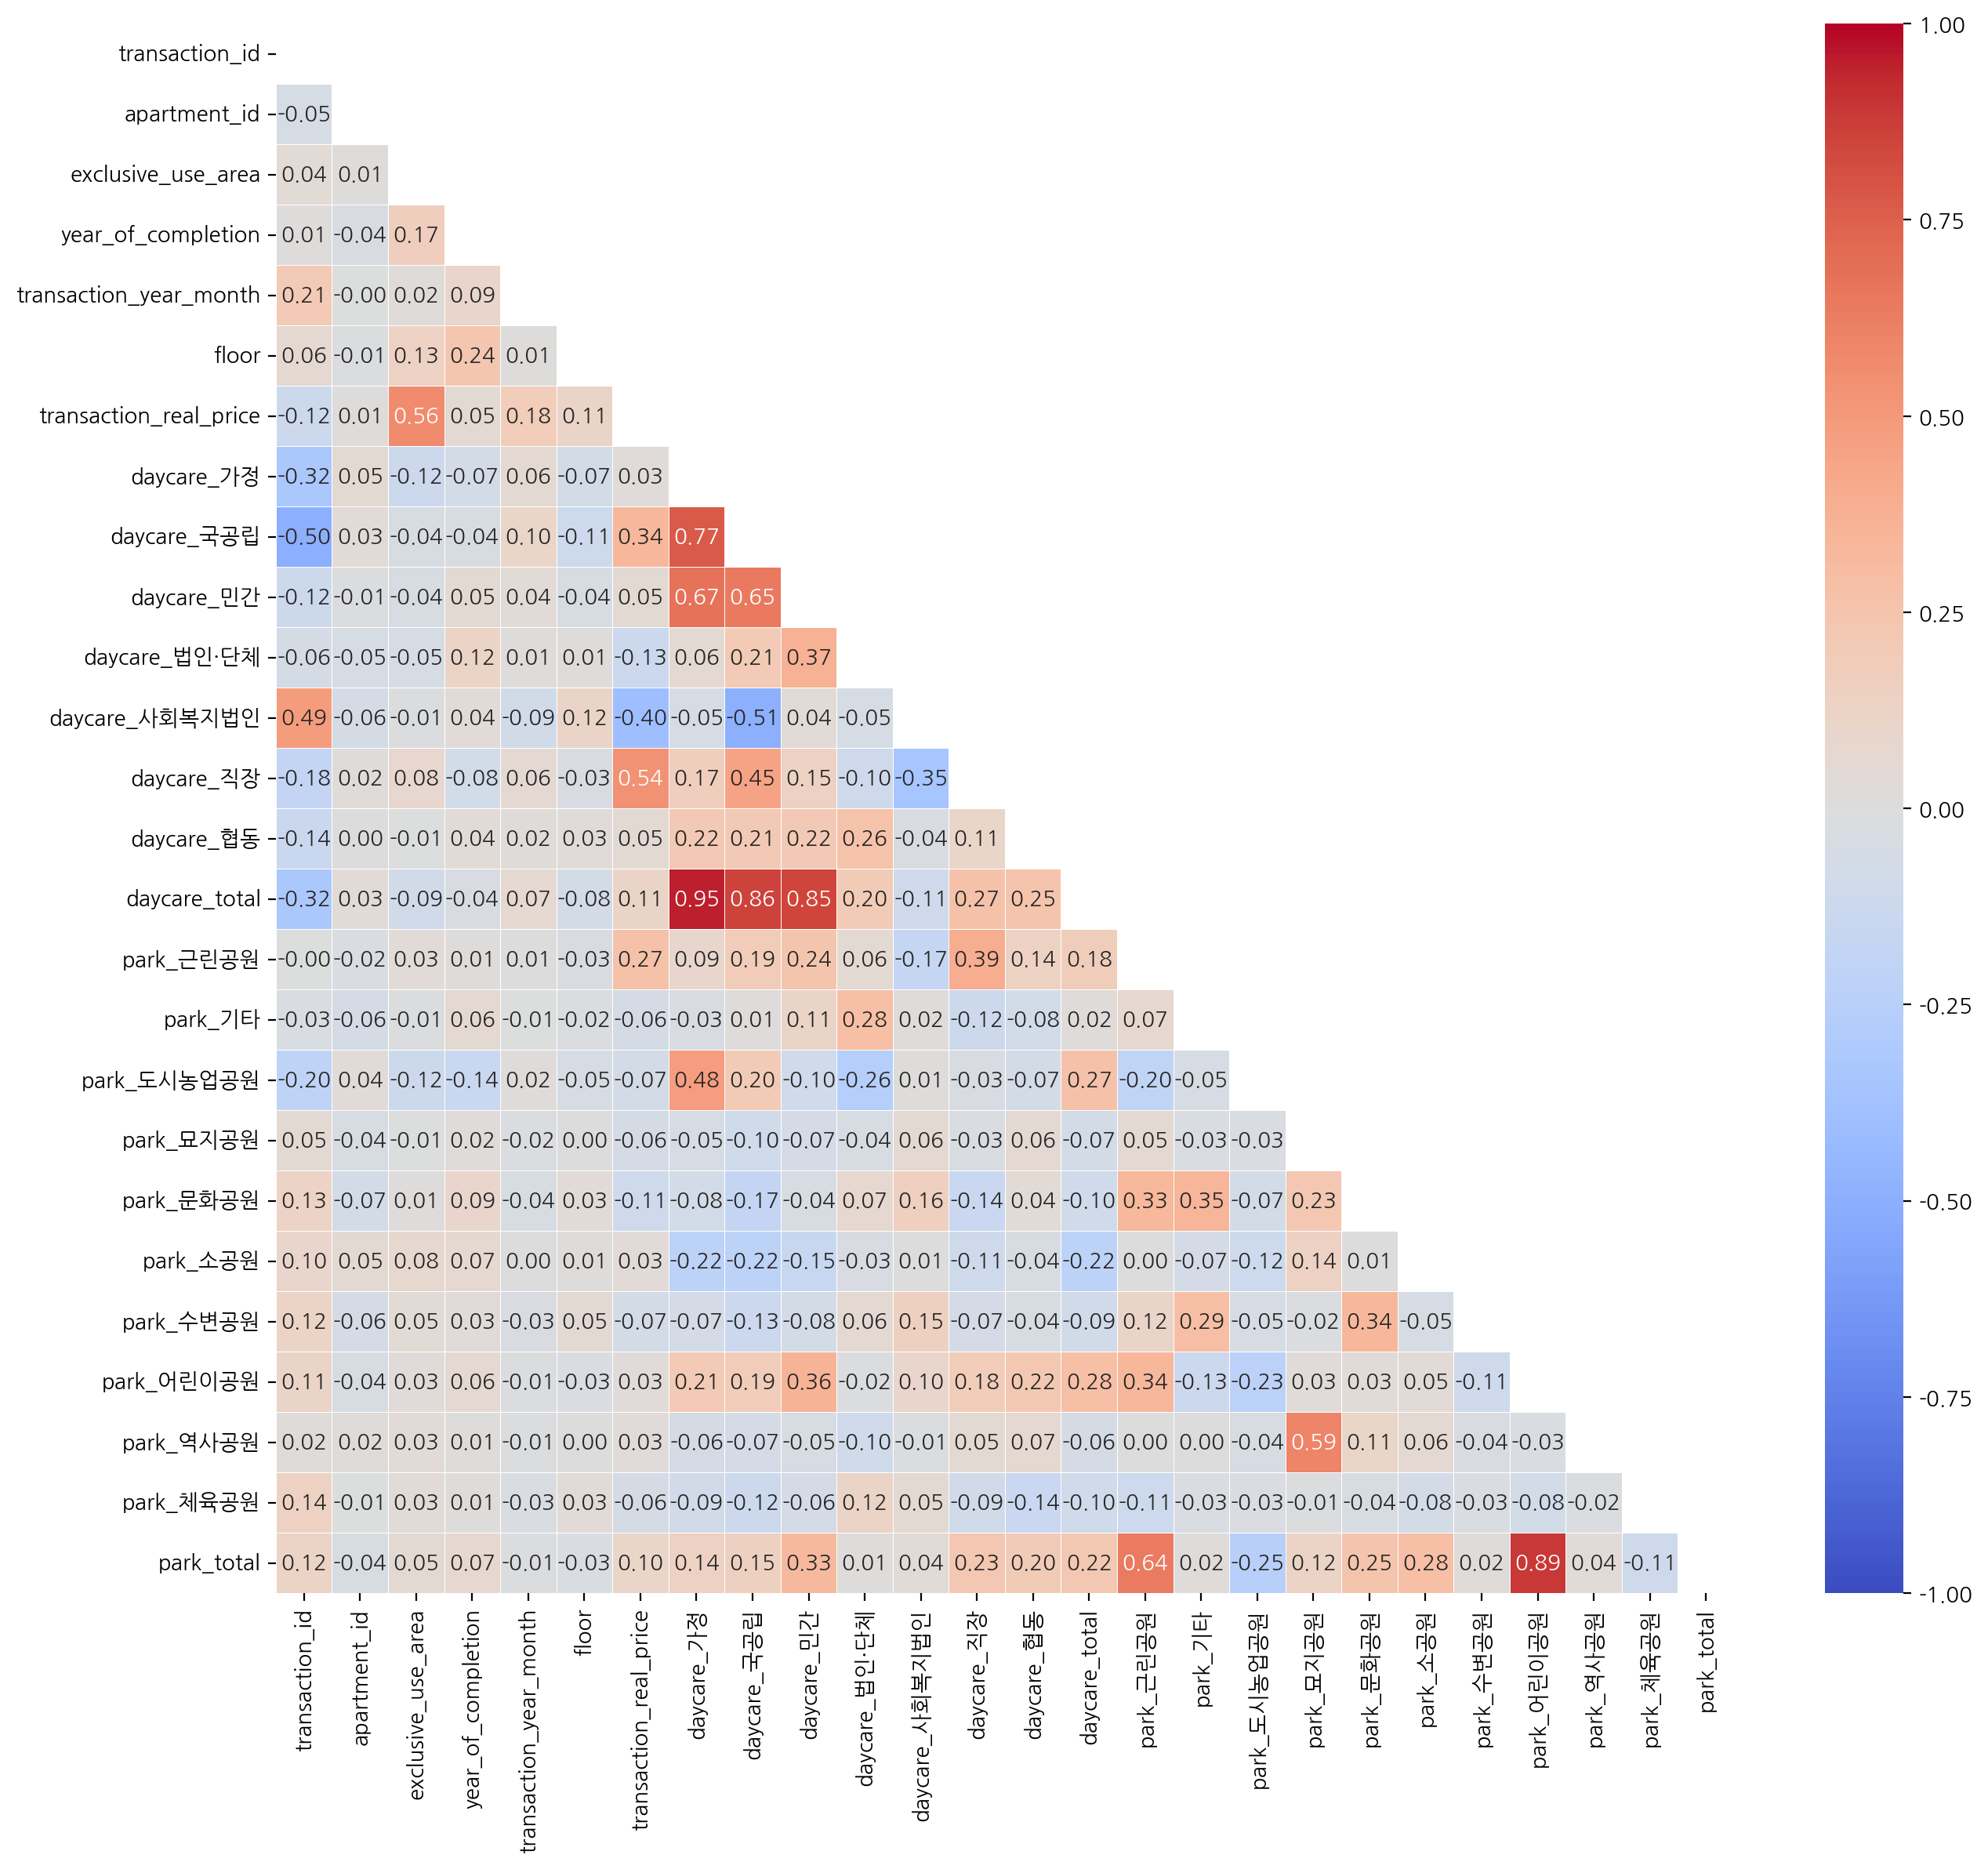

In [29]:
corr = train_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)